# INFO 2950 Group Project: What Makes a Nobel Prize Laureate?

## Research Questions:
What characteristics are likely among Nobel laureates, and what biases do those characteristics reveal within the Nobel committee? 

Some areas we are particularly interested in exploring include: 
1. What countries produce the most Nobel Prize laureates?
2. At what age is your likelihood of winning the highest?
3. Are Nobel Prize laureates getting older?
4. Which universities dominate the Nobel Prize?
5. Does Nobel Prize favor one gender over another?
6. What proportion of laureates won the Nobel Prize more than once?

## Data & Data Cleaning

We were able to locate a dataset available through the Harvard Dataverse Repository, containing data on the characteristics of individual Nobel Prize laureates. We downloaded that initial .csv file, and then pursued the following process to clean up that data and turn it into a dataframe suitable for our research: 

**Step 1:** Imported libraries for our data analysis.

In [86]:
import pandas as pd 
import numpy as np
import seaborn 
from matplotlib import pyplot
from datetime import datetime, date

**Step 2:** Loaded the CSV file, laureate.csv, into a pandas data frame called nobel_data_raw and printed nobel_data_raw to check laureate.csv was loaded correctly into the data frame.

In [87]:
nobel_data_raw = pd.read_csv("laureate.csv")
nobel_data_raw.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


**Step 3:** Printed out the number of rows and columns in nobel_data_raw to make sure that it matches the number of rows and columns of laureate.csv from the original source.

In [88]:
nobel_data_raw.shape

(975, 20)

**Step 4:** Printed out the type of each column so that we know if we need to convert to another type in our upcoming data analysis.

In [89]:
nobel_data_raw.dtypes

id                     int64
firstname             object
surname               object
born                  object
died                  object
bornCountry           object
bornCountryCode       object
bornCity              object
diedCountry           object
diedCountryCode       object
diedCity              object
gender                object
year                 float64
category              object
overallMotivation     object
share                float64
motivation            object
name                  object
city                  object
country               object
dtype: object

**Step 5:** We converted values in 'born' and 'died' columns to datetime. If the values were not formatted to be able to convert to datetime, such as "0000-00-00," we renamed those values as "NaT". We also printed out the head of the data frame to check if the columns were displaying values in datetime and in NaT properly.

In [90]:
nobel_data = nobel_data_raw
nobel_data['born'] = pd.to_datetime(nobel_data_raw['born'], format = '%Y-%m-%d', errors = 'coerce')
nobel_data['died'] = pd.to_datetime(nobel_data_raw['died'], format = '%Y-%m-%d', errors = 'coerce')
nobel_data.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


**Step 6:** We found the age in days of each laureate in the dataframe by using the "year" and year extracted from datetime values in the 'born' column. We made a new column called "age" because it will help us answer a few of our research questions. The values in the 'age' column were rounded down using np.floor to accurately represent each laureate's age at the time of their win. We also used .fillna() to fill missing "age" values with 0 to create models in the future without any errors involving NaN. Lastly, we used .head() to check if our data frame includes the new column.

In [91]:
nobel_data['age'] = nobel_data['year'] - nobel_data['born'].dt.year
nobel_data['age'] = nobel_data['age'].apply(np.floor)
nobel_data['age'] = nobel_data['age'].fillna(0)
nobel_data['age'] = nobel_data['age'].astype(int)
nobel_data.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,44


**Step 7:** Upon this early analysis, we discovered 6 rows in our dataframe that were empty of all data (except for gender: male), and did not correspond to any potential collection gaps that we could ascertain. As such, we concluded that these rows were erroneously included, and dropped them from the dataframe. 

In [92]:
nobel_data = nobel_data.drop([932, 933, 934, 935, 936, 937])

**Step 8:** Created a new dataframe, nobel_data_valid, without any "age" values that are 0 so that we can create models using the "age" column without laureates who are missing their ages. Most of these rows represent organizational winners, rather than individuals, so the age data for these instances would not be relevant to our analysis. 

In [93]:
nobel_data_valid = nobel_data.loc[nobel_data_raw['age']!=0]
nobel_data_valid.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,...,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany,56
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands,49
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,...,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands,37
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France,51
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,...,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France,44


**Step 9:** Printed the types of columns again to check to make sure the conversions made above are reflected in our data frame. 

In [94]:
nobel_data.dtypes

id                            int64
firstname                    object
surname                      object
born                 datetime64[ns]
died                 datetime64[ns]
bornCountry                  object
bornCountryCode              object
bornCity                     object
diedCountry                  object
diedCountryCode              object
diedCity                     object
gender                       object
year                        float64
category                     object
overallMotivation            object
share                       float64
motivation                   object
name                         object
city                         object
country                      object
age                           int32
dtype: object

## Exploratory Analysis

### Question 1: What countries produce the most Nobel Prize laureates?

To begin to explore this question, we first determined the number of laureates from each country represented in the dataset: 

In [95]:
laur_countries = nobel_data['bornCountryCode'].value_counts()
print(laur_countries)

US    275
GB    102
DE     89
FR     56
PL     30
RU     30
SE     30
JP     29
IT     20
NL     19
AT     19
CA     18
CH     17
CN     13
NO     12
DK     12
AU     11
BE      9
ZA      9
HU      9
IN      8
ES      7
EG      6
IL      6
CZ      6
RO      5
IE      5
UA      5
FI      5
PK      4
AR      4
BY      4
DZ      3
NZ      3
LT      3
MX      3
TR      3
PT      3
LR      2
IR      2
LC      2
CO      2
CL      2
TL      2
GT      2
BA      2
MA      2
KR      2
LU      2
ZW      1
YE      1
TW      1
CY      1
PE      1
BD      1
KE      1
GH      1
TT      1
SI      1
NG      1
MG      1
VE      1
GR      1
ID      1
GP      1
IS      1
LV      1
SK      1
HR      1
BR      1
MM      1
CR      1
MK      1
AZ      1
VN      1
BG      1
Name: bornCountryCode, dtype: int64


In [96]:
print(laur_countries.sort_values(ascending = True))

BG      1
ZW      1
YE      1
TW      1
CY      1
PE      1
BD      1
KE      1
TT      1
SI      1
NG      1
MG      1
VE      1
GH      1
ID      1
GR      1
MK      1
CR      1
MM      1
BR      1
AZ      1
SK      1
HR      1
GP      1
VN      1
LV      1
IS      1
LU      2
KR      2
MA      2
LR      2
GT      2
TL      2
CL      2
CO      2
LC      2
IR      2
BA      2
PT      3
MX      3
DZ      3
TR      3
LT      3
NZ      3
BY      4
AR      4
PK      4
FI      5
IE      5
RO      5
UA      5
CZ      6
IL      6
EG      6
ES      7
IN      8
BE      9
HU      9
ZA      9
AU     11
DK     12
NO     12
CN     13
CH     17
CA     18
AT     19
NL     19
IT     20
JP     29
SE     30
RU     30
PL     30
FR     56
DE     89
GB    102
US    275
Name: bornCountryCode, dtype: int64


The five countries that produced the most Nobel laureates are the United States, the United Kingdom, Germany, France, and Poland. Two points of interest arise: first, that the United States alone produced more than three times as many laureates as the next most-awarded country, and second, that there are 27 countries (of the 76 represented by a Nobel laureate) with claim to only a single award. Together, these facts indicate a fairly strong preference for a small set of countries. 

To get a sense of the shape of the distribution, we plotted a histogram of each country's laureates: 

<AxesSubplot:xlabel='bornCountryCode', ylabel='count'>

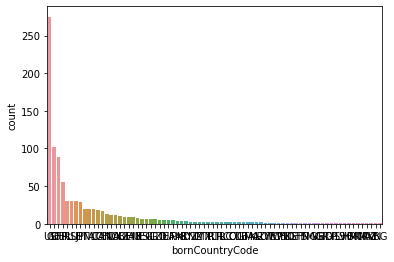

In [97]:
seaborn.countplot(x = 'bornCountryCode', data=nobel_data, order=laur_countries.index)

This plot shows an immense disparity between countries, with a sharp (negative) logarithmic relationship that was indicated by the above statistcs. More analysis regarding regional distributions might be interesting to pursue: how many Nobel laureates come from each geographical region of the world? How has that shifted, if at all, over time? 

### Question 2: At what age is your likelihood of winning the highest?

To start looking into this question, we plotted a histogram of the ages of each Nobel laureate at the time of their award, and calculated the mean over the entire dataset. 

<AxesSubplot:xlabel='age', ylabel='Count'>

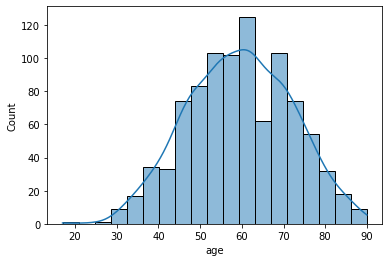

In [98]:
seaborn.histplot(nobel_data_valid['age'], kde=True)

In [99]:

print("The mean age of a Nobel laureate is "+str(nobel_data_valid['age'].mean())+", with a standard deviation of "+str(nobel_data_valid['age'].std())+".")

The mean age of a Nobel laureate is 59.4593147751606, with a standard deviation of 12.384339675481367.


The average Nobel laureate is awarded at approximately age 60, with a standard deviation of about 12 years. 

The Nobel committee may be selecting for older nominees, or else the kind of contribution to the world that earns someone a Nobel prize may simply require a lengthy and dedicated career from most people. 

### Question 3: Are Nobel Prize laureates getting older?

In [100]:
nobel_data_valid.groupby('year', as_index = False)["age"].mean()

,year,age
0,1901.0,61.000000
1,1902.0,56.285714
2,1903.0,52.000000
3,1904.0,63.000000
4,1905.0,59.200000
5,1906.0,56.666667
6,1907.0,57.333333
7,1908.0,58.500000
8,1909.0,58.000000
9,1910.0,68.250000


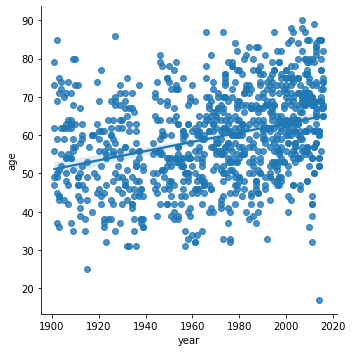

In [101]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age')

There is an increasing trend above, showing that Nobel Prize laureates are getting older as years pass by with some outliers. There are few outliers that stand out, such as a laureate who seemed to have won their prize at an age of around 25 close to the year 1915 and anoher who seemed to won their prize at an age of around 15 close to the year 2016. In future analysis in more depth, we can look at the outliers and find common characteristics that could helps us find out if certain characteristics help people win Nobel Prizes at a younger age.

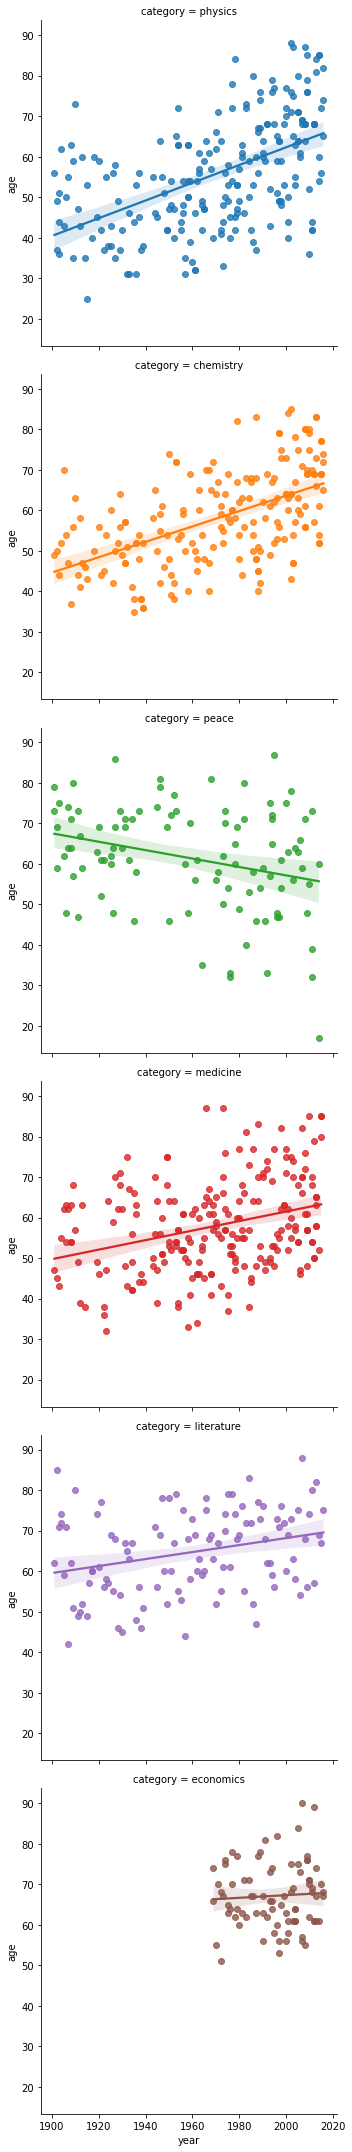

In [102]:
seaborn.lmplot(data = nobel_data_valid, x = 'year', y = 'age', row = 'category', hue = 'category')

There is an increasing trend for all categories, except for the category of Peace, as shown by the plots above. We could dive more into why only the category of Peace shows a decreasing trend by looking at the rows with Peace as its category and find who exactly are winning the Peace prizes.

### Question 4: Which universities dominate the Nobel Prize?

In [103]:
university_data = nobel_data.groupby(['name', 'country'])['share'].count().sort_values(ascending = False).head(10)
university_data

name                                          country       
University of California                      USA               34
Harvard University                            USA               27
Stanford University                           USA               18
Massachusetts Institute of Technology (MIT)   USA               18
California Institute of Technology (Caltech)  USA               17
University of Cambridge                       United Kingdom    17
University of Chicago                         USA               17
Columbia University                           USA               16
Princeton University                          USA               14
Rockefeller University                        USA               11
Name: share, dtype: int64

All the universities except for Cambridge are located in the USA. It is clear that University of California and Harvard University are first place and second place, respectively. However, there is a narrow gap among Stanford, MIT, Caltech, Cambridge, UChicago, and Columbia. We can expand our analysis by looking at the strengths and weaknesses of these schools in all 6 categories. For example, we could look if a school dominate in one category but are weak in others.

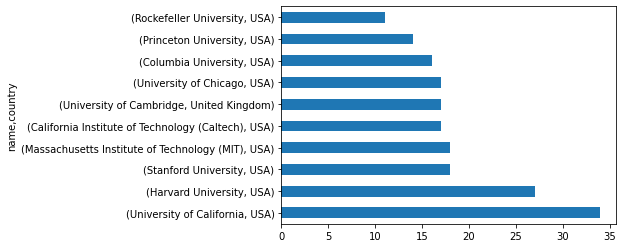

In [104]:
university_data_plot = university_data.plot.barh(y = 'name')

After finding which 10 universities dominate the Nobel Prize, we discovered that all the top 10 universities except one are located in the United States. There is a tie for a third place among MIT and Stanford University. There is also another tie for 4th place among Caltech, University of Cambridge, and University of Chicago. As shown by the horizontal bar graph, after University of California and Harvard University, the margin among universities becomes smaller. 

### Question 5: Does the Nobel Prize favor one gender over the other? 

In [105]:
gender_count=nobel_data_raw['gender'].value_counts()
gender_count.head()

male      899
female     50
org        26
Name: gender, dtype: int64

<AxesSubplot:>

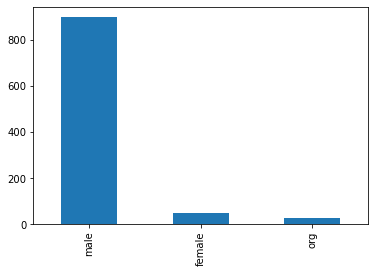

In [106]:
gender_count.plot.bar(y='')

As shown in the bar plot, the amount of male Nobel laureates is significantly higher than the amount of female Nobel laureates and the amount of organizational laureates. 

As there are 849 more male laureates than female laureates, there is a correlation between gender and being a laureate - the Nobel prize might favor male over female.

In [107]:
gender_data = nobel_data_raw.groupby(['gender','category'])['share'].count().sort_values(ascending = False)
gender_data.head(30)

gender  category  
male    physics       220
        medicine      215
        chemistry     190
        literature     99
        peace          88
        economics      81
org     peace          26
female  peace          16
        literature     14
        medicine       12
        chemistry       4
        economics       2
        physics         2
Name: share, dtype: int64

<AxesSubplot:xlabel='gender,category'>

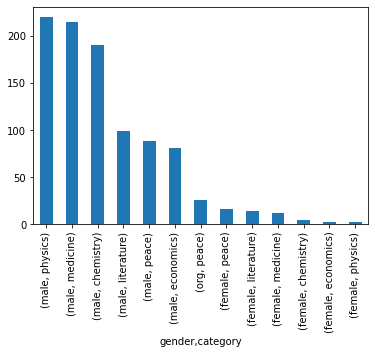

In [108]:
gender_data.plot.bar(y='category')

This bar plot shows the amount of female and male laureates in different categories. Some observations including physics has the most male laureate but the least female laureates; the second biggest difference is between male chemistry laureates and female chemistry laureates; the difference between the amount of male economics laureates and the amount of female economics laureates is the smallest; organizational laureates only appeared in peace category.

### Question 6: What proportion of laureates won the Nobel Prize more than once?

In [109]:
nobel_data.groupby("surname").filter(lambda repeats: len(repeats) >= 2)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,age
5,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,...,female,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",NaN,NaN,NaN,36
6,6,Marie,"Curie, née Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,...,female,1911.0,chemistry,NaN,1.0,"""in recognition of her services to the advance...",Sorbonne University,Paris,France,44
9,10,Joseph John,Thomson,1856-12-18,1940-08-30,United Kingdom,GB,"Cheetham Hill, near Manchester",United Kingdom,GB,...,male,1906.0,physics,NaN,1.0,"""in recognition of the great merits of his the...",University of Cambridge,Cambridge,United Kingdom,50
19,20,Sir William Henry,Bragg,1862-07-02,1942-03-12,United Kingdom,GB,Wigton,United Kingdom,GB,...,male,1915.0,physics,NaN,2.0,"""for their services in the analysis of crystal...",University College,London,United Kingdom,53
20,21,William Lawrence,Bragg,1890-03-31,1971-07-01,Australia,AU,Adelaide,United Kingdom,GB,...,male,1915.0,physics,NaN,2.0,"""for their services in the analysis of crystal...",Victoria University,Manchester,United Kingdom,25
26,27,Niels Henrik David,Bohr,1885-10-07,1962-11-18,Denmark,DK,Copenhagen,Denmark,DK,...,male,1922.0,physics,NaN,1.0,"""for his services in the investigation of the ...",Copenhagen University,Copenhagen,Denmark,37
28,29,Karl Manne Georg,Siegbahn,1886-12-03,1978-09-26,Sweden,SE,Lund,Sweden,SE,...,male,1924.0,physics,NaN,1.0,"""for his discoveries and research in the field...",Uppsala University,Uppsala,Sweden,38
33,34,Charles Thomson Rees,Wilson,1869-02-14,1959-11-15,Scotland,GB,Glencorse,Scotland,GB,...,male,1927.0,physics,NaN,2.0,"""for his method of making the paths of electri...",University of Cambridge,Cambridge,United Kingdom,58
34,35,Owen Willans,Richardson,1879-04-26,1959-02-15,United Kingdom,GB,Dewsbury,United Kingdom,GB,...,male,1928.0,physics,NaN,1.0,"""for his work on the thermionic phenomenon and...",London University,London,United Kingdom,49
41,42,Victor Franz,Hess,1883-06-24,1964-12-17,Austria,AT,Peggau,USA,US,...,male,1936.0,physics,NaN,2.0,"""for his discovery of cosmic radiation""",Innsbruck University,Innsbruck,Austria,53


7 laureates (including both individuals and organizations) had won the Nobel Prize more than once. From the above table, we can see their names: J Bardeen, M. Currie, L. Pauling, F. Sanger, K. Barry Sharpless, ICRC, and UNHCR.

7 out of 969 laureates are awarded the Nobel Prize multiple times. The proportion is 0.722394%, which is a small ratio but also indicates that it’s possible to reach such achievements in one’s career.

## Data Description 
### What are the observations (rows) and the attributes (columns)?

The observations in our data frame are 937 Nobel Prize laureates, representing all winners from the first prizes awarded through the year 2016. In other words, each row represents a single laureate.

The attributes are:

- id - identifies each laureate 
- firstname - laureate's first name 
- surname - laureate's surname 
- born - laureate's birth date 
- died - laureate's death date 
- bornCountry - laureate's birth place 
- bornCountryCode - the country code of the laureate's country of origin
- bornCity - the name of the city where the laureate was born
- diedCountry - the name of the country where the laureate died
- diedCountryCode - the country code of the laureate's country of death
- diedCity - the name of the city where the laureate died
- gender - laureate's gender or laureate's organization ('male,' 'female,' or 'org' - organization)
- year - the year that the laureate won their prize
- category - the category in which the laureate won their prize ('physics,' 'chemistry,' 'peace,' 'medicine,' 'literature,' 'economics')
- overallMotivation - overall motivation for being awarded the prize
- share - number of other laureates who share the prize 
- motivation - the motivation behind being awarded the prize

### Why was this dataset created?

The dataset was assembled by Maryna Kuzmenko in 2016, and intended to be a starting point for social sciences research into the characteristics of Nobel prize awards and laureates (both quantitative and categorical). It is available through the Harvard Dataverse Repository. 

### Who funded the creation of the dataset?

Harvard's Dataverse Repository is free and open to researchers for sharing and archiving research data. Maryna Kuzmenko holds a Doctorate of Philosophy; no information on the funding for the creation of this particular dataset is available, but it appears to have been created while she was pursuing her doctorate at Kyiv University. 

### Are there any errors, sources of noise, or redundancies in the dataset?

We were able to identify one section of rows that seemed to be included erroneously (containing no data except for the gender characteristic, and not matching with any potential missing data that we could find). As such, we removed those rows from the dataset before continuing with our own analysis.

#### Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset? If so, please describe how.

By the nature of our dataset, each instance is identifiable as a specific person, by name, location, age, and more. This was determined not to be a privacy concern, because of the public nature of the Nobel Prize and its laureates.  

### What processes might have influenced what data was observed and recorded and what was not?

Fortunately for us, the Nobel Prize is a prestigious and public-facing award for excellence in a field; as such, information about each year's awards, and the laureates who received them, is generally well-documented. We are reassured by the completeness of our dataset: though not every row is perfectly complete, as a whole data on each laureate is present and accurate (by our appraisal). 

### What preprocessing was done, and how did the data come to be in the form that you are using?

The data on each laureate was collected into a single .csv file, with each instance representing a single Nobel Prize winner, and columns with characteristics about each of those instances. The entire population of laureates (through 2016) is represented, and no transformations or further processing was done to the data once collected. 

### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Though there is no record that the Nobel laureates that were living at the time this dataset was assembled were notified, the data collected about them (as at least semi-public figures) is publicly available. 

### Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box)

https://drive.google.com/file/d/1x30zuyFBpWepBgc7cQt9x1yU46Qscgtg/view?usp=sharing

## Data Limitations

One primary limitation of our data is that it was collected in 2016: there have been 6 years' worth of laureates since then, and thus 6 years of data we cannot work with. It is also of some concern that the most recent years are missing: if there are any trends over time in our data, this might limit our ability to accurately model those trends or make predictions. Additionally, all the organizations and some people have missing data, such as birth dates, which means that we have to work around those missing data to complete our data analysis.